# Introducción

En Colombia existen unas pruebas que se realizan a nivel nacional una vez que se termina el bachillerato, llamadas pruebas saber o antiguamente icfes, el objetivo de estas pruebas es medir la calidad de la educación en el país y a su vez que cada colegio pueda tener una idea de la calidad de su educación dado los resultados de sus estudiantes.

La prueba se compone de 5 secciones para medir diferentes componentes principales en los que se basa la educación acá en Colombia, los cuales son matemáticas, lectura critica, naturales, ciencias sociales e ingles.  Cada sección se califica del 0 al 100, el resultado total de la prueba estará en un rango de 0 a 500.Los resultados de estas pruebas son bastantes importantes de cara a los estudios profesionales en las universidades ya que un alto puntaje te puede asegurar una beca completa de tus estudios en las mejores universidades del país.


# Dataset

El dataset de estas pruebas se sacó de la página de datos abiertos del gobierno https://www.datos.gov.co/Educaci-n/Saber-11-2020-2/rnvb-vnyh \
<img src="dataset2020.PNG" width="1000">

Inicialmente tenemos un dataset con una cantidad de 81 columnas, de las cuales se seleccionaron 15 que son de interés para el análisis que se va a realizar, esto nos ayuda a reducir el tamaño en memoria del dataframe.

In [123]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
from datetime import date

In [2]:
#%matplotlib widget
%matplotlib inline
colors = sns.color_palette("pastel")

La columnas que utilizaremos seran:
   * ESTU_GENERO, que será el género del estudiante
   * ESTU_FECHANACIMIENTO, la fecha en la que nació el estudiante
   * FAMI_ESTRATOVIVIENDA, el nivel socioeconómico del sector donde vive
   * FAMI_TIENEINTERNET, nos dice si el estudiante cuenta con internet en casa
   * FAMI_TIENECOMPUTADOR, nos dice si el estudiante cuenta con un computadora en casa
   * COLE_BILINGUE, nos dice si el colegio del estudiante enfatiza en otros idiomas ademas del español para dar las clases y actividades
   * COLE_AREA_UBICACION, nos dice si el colegio está ubicado en un área rural o dentro de ciudades
   * 'COLE_DEPTO_UBICACION', Colombia se divide en departamentos, esta columna nos dice en cual se encuentra el colegio
   * El resto de las columnas serán de los puntajes de las secciones anteriormente mencionadas 

In [3]:
fields = ['ESTU_GENERO','ESTU_FECHANACIMIENTO','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET',
     'FAMI_TIENECOMPUTADOR','COLE_BILINGUE','PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS',
     'PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','DESEMP_INGLES','PUNT_GLOBAL',
     'COLE_AREA_UBICACION','COLE_DEPTO_UBICACION']

In [96]:
df = pd.read_csv('Saber_11__2020-2.csv',usecols = fields)

In [97]:
print(f'Numero de filas: {len(df.index)}')

Numero de filas: 504872


In [98]:
df.head()

,ESTU_GENERO,ESTU_FECHANACIMIENTO,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_BILINGUE,COLE_AREA_UBICACION,COLE_DEPTO_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,DESEMP_INGLES,PUNT_GLOBAL
0,F,03/03/2003 12:00:00 AM,Estrato 2,Si,Si,N,RURAL,CUNDINAMARCA,54,65,41,33,55.0,A1,244
1,M,05/10/2002 12:00:00 AM,Estrato 3,Si,No,N,RURAL,CUNDINAMARCA,57,43,46,49,33.0,A-,238
2,F,12/14/2003 12:00:00 AM,Estrato 1,No,No,N,RURAL,CUNDINAMARCA,59,72,63,68,59.0,A2,325
3,M,04/12/2003 12:00:00 AM,Sin Estrato,Si,No,N,RURAL,CUNDINAMARCA,47,55,46,43,47.0,A-,238
4,F,03/03/2004 12:00:00 AM,Estrato 5,Si,Si,N,URBANO,CUNDINAMARCA,37,48,44,32,43.0,A-,202


In [99]:
df.dtypes

ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
FAMI_ESTRATOVIVIENDA         object
FAMI_TIENEINTERNET           object
FAMI_TIENECOMPUTADOR         object
COLE_BILINGUE                object
COLE_AREA_UBICACION          object
COLE_DEPTO_UBICACION         object
PUNT_LECTURA_CRITICA          int64
PUNT_MATEMATICAS              int64
PUNT_C_NATURALES              int64
PUNT_SOCIALES_CIUDADANAS      int64
PUNT_INGLES                 float64
DESEMP_INGLES                object
PUNT_GLOBAL                   int64
dtype: object

# Limpieza de datos

Para sacar parte de los datos de este dataset a cada estudiante en el proceso de inscripción a la prueba se le coloca a llenar una encuesta con la que medir aspectos socioeconómicos de su entorno y su calidad de vida. Normalmente esta encuesta se hace a mano por lo que al momento de digitalizar o al no existir un control total en validar que se llene por completo, se pueden encontrar varios valores vacíos dentro del dataset.

In [100]:
df.isna().sum()

ESTU_GENERO                     8
ESTU_FECHANACIMIENTO            0
FAMI_ESTRATOVIVIENDA        16952
FAMI_TIENEINTERNET          13665
FAMI_TIENECOMPUTADOR        20194
COLE_BILINGUE               83007
COLE_AREA_UBICACION             0
COLE_DEPTO_UBICACION            0
PUNT_LECTURA_CRITICA            0
PUNT_MATEMATICAS                0
PUNT_C_NATURALES                0
PUNT_SOCIALES_CIUDADANAS        0
PUNT_INGLES                   334
DESEMP_INGLES                   0
PUNT_GLOBAL                     0
dtype: int64

En el caso de las columnas ESTU_GENERO y FAMI_ESTRATOVIVIENDA representan una cantidad pequeña para el tamaño de mi dataset,procedemos a eliminar estas filas

In [101]:
df.dropna(subset=['ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA'],inplace=True)

Por otra parte las columnas FAMI_TIENECOMPUTADOR y FAMI_TIENEINTERNET deberían estar fuertemente relacionada con el estrato de social ya que este valor esta directamente vinculado con el costo de vida de las personas, por eso se utilizara esta columna para rellenar los Nan con la misma distribución

In [102]:
df_estrato_internet = df.pivot_table('PUNT_GLOBAL',index ='FAMI_ESTRATOVIVIENDA',columns = 'FAMI_TIENEINTERNET',aggfunc='count')
display(df_estrato_internet)

FAMI_TIENEINTERNET,No,Si
FAMI_ESTRATOVIVIENDA,,
Estrato 1,77885,74542
Estrato 2,42448,139367
Estrato 3,11159,92117
Estrato 4,2512,20859
Estrato 5,1123,5850
Estrato 6,750,2304
Sin Estrato,10609,4926


In [103]:
df_estrato_pc = df.pivot_table('PUNT_GLOBAL',index ='FAMI_ESTRATOVIVIENDA',columns = 'FAMI_TIENECOMPUTADOR',aggfunc='count')
display(df_estrato_pc)

FAMI_TIENECOMPUTADOR,No,Si
FAMI_ESTRATOVIVIENDA,,
Estrato 1,91703,58549
Estrato 2,62254,117386
Estrato 3,18491,83471
Estrato 4,3306,19781
Estrato 5,1348,5512
Estrato 6,825,2177
Sin Estrato,10953,4289


In [104]:
df_estrato_bl = df.pivot_table('PUNT_GLOBAL',index ='FAMI_ESTRATOVIVIENDA',columns = 'COLE_BILINGUE',aggfunc='count')
display(df_estrato_bl)

COLE_BILINGUE,N,S
FAMI_ESTRATOVIVIENDA,,
Estrato 1,124551,1903
Estrato 2,152771,1385
Estrato 3,87049,738
Estrato 4,19113,358
Estrato 5,5699,173
Estrato 6,2476,66
Sin Estrato,11255,386


In [105]:
def fill_nan_with_distribution(df,pivot_df,unique_values,nan_col,reference_col):
    #se realiza una transformación al dataframe para sacar la distribucion de la columna guía
    prob = (pivot_df[unique_values[1]]/pivot_df.sum(axis=1)).to_dict() 
    for k,p_value in prob.items():
        mask = ((df[nan_col].isna()) & (df[reference_col] == k))
        size = mask.sum()
        data = df[nan_col].copy()
        if size > 0:
            p = [p_value,1-p_value]
            fill_values = np.random.choice(unique_values,size,p)
            data[mask] = fill_values
            df[nan_col] = data

In [106]:
#Se ejecuta la función que rellena los Nan con la misma distribución con respecto al estrato de vivienda
fill_nan_with_distribution(df,df_estrato_internet,['No','Si'],'FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA')
fill_nan_with_distribution(df,df_estrato_pc,['No','Si'],'FAMI_TIENECOMPUTADOR','FAMI_ESTRATOVIVIENDA')
fill_nan_with_distribution(df,df_estrato_bl,['N','S'],'COLE_BILINGUE','FAMI_ESTRATOVIVIENDA')

En el caso de los puntajes vacíos de inglés, aunque son pocos podemos asegurar el valor correcto que falta realizando la operación de Puntaje total - la sumatoria del resto de puntajes de la prueba

In [108]:
df_nan_ingles = df[df['PUNT_INGLES'].isna()]
new_values = (df_nan_ingles['PUNT_GLOBAL'] - df_nan_ingles['PUNT_LECTURA_CRITICA'] - df_nan_ingles['PUNT_MATEMATICAS'] 
 - df_nan_ingles['PUNT_C_NATURALES'] - df_nan_ingles['PUNT_SOCIALES_CIUDADANAS'])
df.loc[df['PUNT_INGLES'].isna(),'PUNT_INGLES']= new_values

Comprobamos que ya no existen valores vacios

In [226]:
df.isna().sum()

ESTU_GENERO                 0
ESTU_FECHANACIMIENTO        0
FAMI_ESTRATOVIVIENDA        0
FAMI_TIENEINTERNET          0
FAMI_TIENECOMPUTADOR        0
COLE_BILINGUE               0
COLE_AREA_UBICACION         0
COLE_DEPTO_UBICACION        0
PUNT_LECTURA_CRITICA        0
PUNT_MATEMATICAS            0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 0
DESEMP_INGLES               0
PUNT_GLOBAL                 0
EDAD                        0
dtype: int64

# Análisis General

In [58]:
#Listamos las diferentes divisiones o departamentos de Colombia
df['COLE_DEPTO_UBICACION'].unique()

array(['CUNDINAMARCA', 'BOGOTÁ', 'ANTIOQUIA', 'BOLIVAR',
       'NORTE SANTANDER', 'CAQUETA', 'RISARALDA', 'SANTANDER',
       'MAGDALENA', 'CALDAS', 'VALLE', 'SUCRE', 'ATLANTICO', 'QUINDIO',
       'LA GUAJIRA', 'HUILA', 'CORDOBA', 'CAUCA', 'GUAVIARE', 'PUTUMAYO',
       'CESAR', 'NARIÑO', 'CASANARE', 'CHOCO', 'ARAUCA', 'VICHADA',
       'META', 'TOLIMA', 'BOYACA', 'AMAZONAS', 'SAN ANDRES', 'VAUPES',
       'GUAINIA'], dtype=object)

In [ ]:
# Le quitamos la hora a la fehca de nacimiento y lo convertimos a datetime
tempSerie = df['ESTU_FECHANACIMIENTO'].apply(lambda x: x.split(' ')[0].replace('/','-')).copy() 
df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(tempSerie, errors = 'coerce')

In [240]:
def calculate_age(born):
    '''Calcula la edad tomando como referencia el día actual'''
    today = date.today()
    return int(today.year - born.year - ((today.month, today.day) < (born.month, born.day)))

In [241]:
#Eliminamos aquellos registros que tienen problemas en este campo
df.dropna(subset=['ESTU_FECHANACIMIENTO'],inplace=True) 

df['EDAD'] = df['ESTU_FECHANACIMIENTO'].apply(calculate_age)

In [242]:
df['EDAD'].unique()

array([ 18,  19,  17,  20,  21,  24,  23,  57,  16,  41,  31,  22,  49,
        36,  26,  34,  27,  51,  38,  30,  40,  32,  46,  33,  29,  28,
        25,   8,  35,  48,  43,  15,  14,  56,   1,  13,  37,  44,  54,
        39,  42,  59,  10,  53,  67,   9,  45,  11,  66,  47,  63,  52,
        55,  58,  12,  69,  50,  62,  64,  61,  60,  65,   7,  75,   6,
        77,  80,  81, 121,   3,   2,  68,  70,  73,  72,  71,  76],
      dtype=int64)

vemos que relamente hay muchos datos mal colocados en la encuesta

In [243]:
df_edad = df.loc[(df['EDAD'] > 12) & (df['EDAD'] < 25)]
display(df_edad.groupby('EDAD').count()['PUNT_GLOBAL'].sort_values(ascending=False))

EDAD
18    199874
17    123697
19     94328
20     37386
21     10946
16      5606
22      3645
23      1845
24      1205
15       190
14        30
13        23
Name: PUNT_GLOBAL, dtype: int64

vemos que la mayoria esta en los 18 años que es la edad donde en Colombia se le concidera al ciudadano mayor de edad y obtiene la totalidad de sus derechos y deberes como ciudadano Colombiano

## Puntaje global x Departamentos

In [142]:
#Lista del promedio de la prueba por departamento ordenado de manera descendente
df.groupby('COLE_DEPTO_UBICACION')['PUNT_GLOBAL'].mean().sort_values(ascending= False)

COLE_DEPTO_UBICACION
BOGOTÁ             267.384456
SANTANDER          264.884310
BOYACA             261.150328
CUNDINAMARCA       258.664294
NORTE SANTANDER    257.110607
QUINDIO            253.966105
RISARALDA          253.542766
META               251.350244
HUILA              251.005396
CALDAS             250.629979
CASANARE           248.955688
NARIÑO             248.080717
VALLE              245.650095
ATLANTICO          244.733133
ANTIOQUIA          244.365251
TOLIMA             242.583838
CESAR              240.951372
ARAUCA             240.894019
PUTUMAYO           238.521427
CAQUETA            236.997335
SUCRE              236.598651
SAN ANDRES         236.471601
CORDOBA            235.766365
CAUCA              231.443535
GUAVIARE           231.250321
BOLIVAR            230.408369
MAGDALENA          226.934709
LA GUAJIRA         226.220341
GUAINIA            224.823308
VICHADA            223.493750
AMAZONAS           221.503311
VAUPES             210.187919
CHOCO              

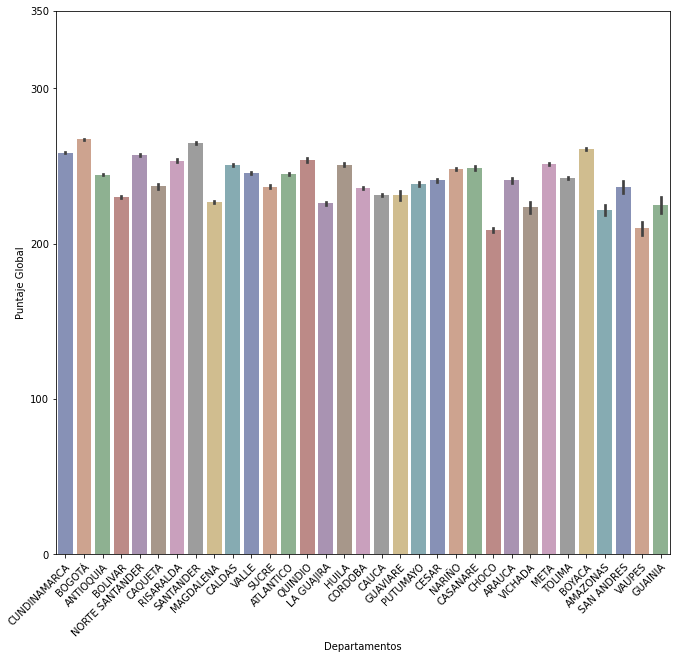

In [230]:
dims = (11, 10)
fig, ax = plt.subplots(figsize=dims)
g = sns.barplot(
    data=df, x='COLE_DEPTO_UBICACION', y='PUNT_GLOBAL', palette='dark', alpha=.5,ax=ax
)
g.set(xlabel='Departamentos' , ylabel='Puntaje Global')
ticks = [0,100,200,300,350]
g.set_yticks(ticks)
g.set_xticklabels(g.get_xticklabels(),rotation=45,ha='right', rotation_mode='anchor')

plt.show()

Podemos analizar que las medias en general se encuentran no tan alejadas entre si en la mayoría de los casos y Bogota que es la capital de Colombia lidera con el mejor promedio. Lo preocupante del asunto es que la mayoría de las medias se encuentran por debajo de la mitad posible de nota del examen

## Puntaje x Tipo de prueba

In [203]:
df_notas_multi = pd.melt(df, id_vars=['PUNT_GLOBAL'], var_name = 'Examenes',value_name='Resultados',
                value_vars=['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES'])
df_notas_multi = df_notas_multi.astype({'Resultados': 'int64'})
df_notas_multi['Examenes'].replace({'PUNT_LECTURA_CRITICA': 'Lectura critica', 'PUNT_MATEMATICAS': 'Matematicas','PUNT_C_NATURALES': 'Naturales',
                                  'PUNT_SOCIALES_CIUDADANAS':'Sociales','PUNT_INGLES':'Ingles'}, inplace=True)
df_notas_multi.sample(10)

,PUNT_GLOBAL,Examenes,Resultados
139319,300,Lectura critica,66
2357582,244,Ingles,58
1217476,217,Naturales,38
106030,328,Lectura critica,70
2072667,235,Ingles,48
2324357,298,Ingles,69
1907462,291,Sociales,64
554821,253,Matematicas,45
1813702,323,Sociales,58
766060,200,Matematicas,44


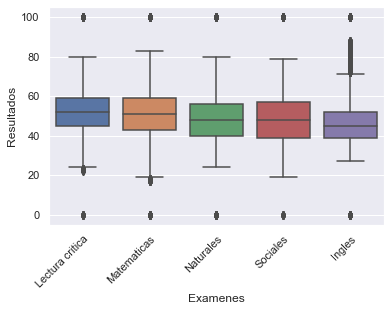

In [214]:
g = sns.boxplot( data=df_notas_multi,x="Examenes", y="Resultados")
g.set_xticklabels(g.get_xticklabels(),rotation=45,ha='right', rotation_mode='anchor')
plt.show()

Con esta grafica podemos ver como se distribuyen los datos de los puntajes con respecto a las diferentes pruebas, podemos notar que a nivel general en Colombia el inglés tiene de media el peor resultado, cosa que podemos ver en el día a día, ya que  la gran mayoría de colombianos no hablan ingles y esta grafica nos aporta información de que tanto se debería reforzar este punto en la mayoría de colegios.   

## Puntaje x Tipo de prueba x Departamento

In [227]:
df_notas_departamentos = pd.melt(df, id_vars=['COLE_DEPTO_UBICACION'], var_name = 'Examenes',value_name='Resultados',
                     value_vars=['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES'])
df_notas_departamentos['Examenes'].replace({'PUNT_LECTURA_CRITICA': 'Lectura critica', 'PUNT_MATEMATICAS': 'Matematicas','PUNT_C_NATURALES': 'Naturales',
                                  'PUNT_SOCIALES_CIUDADANAS':'Sociales','PUNT_INGLES':'Ingles'}, inplace=True)

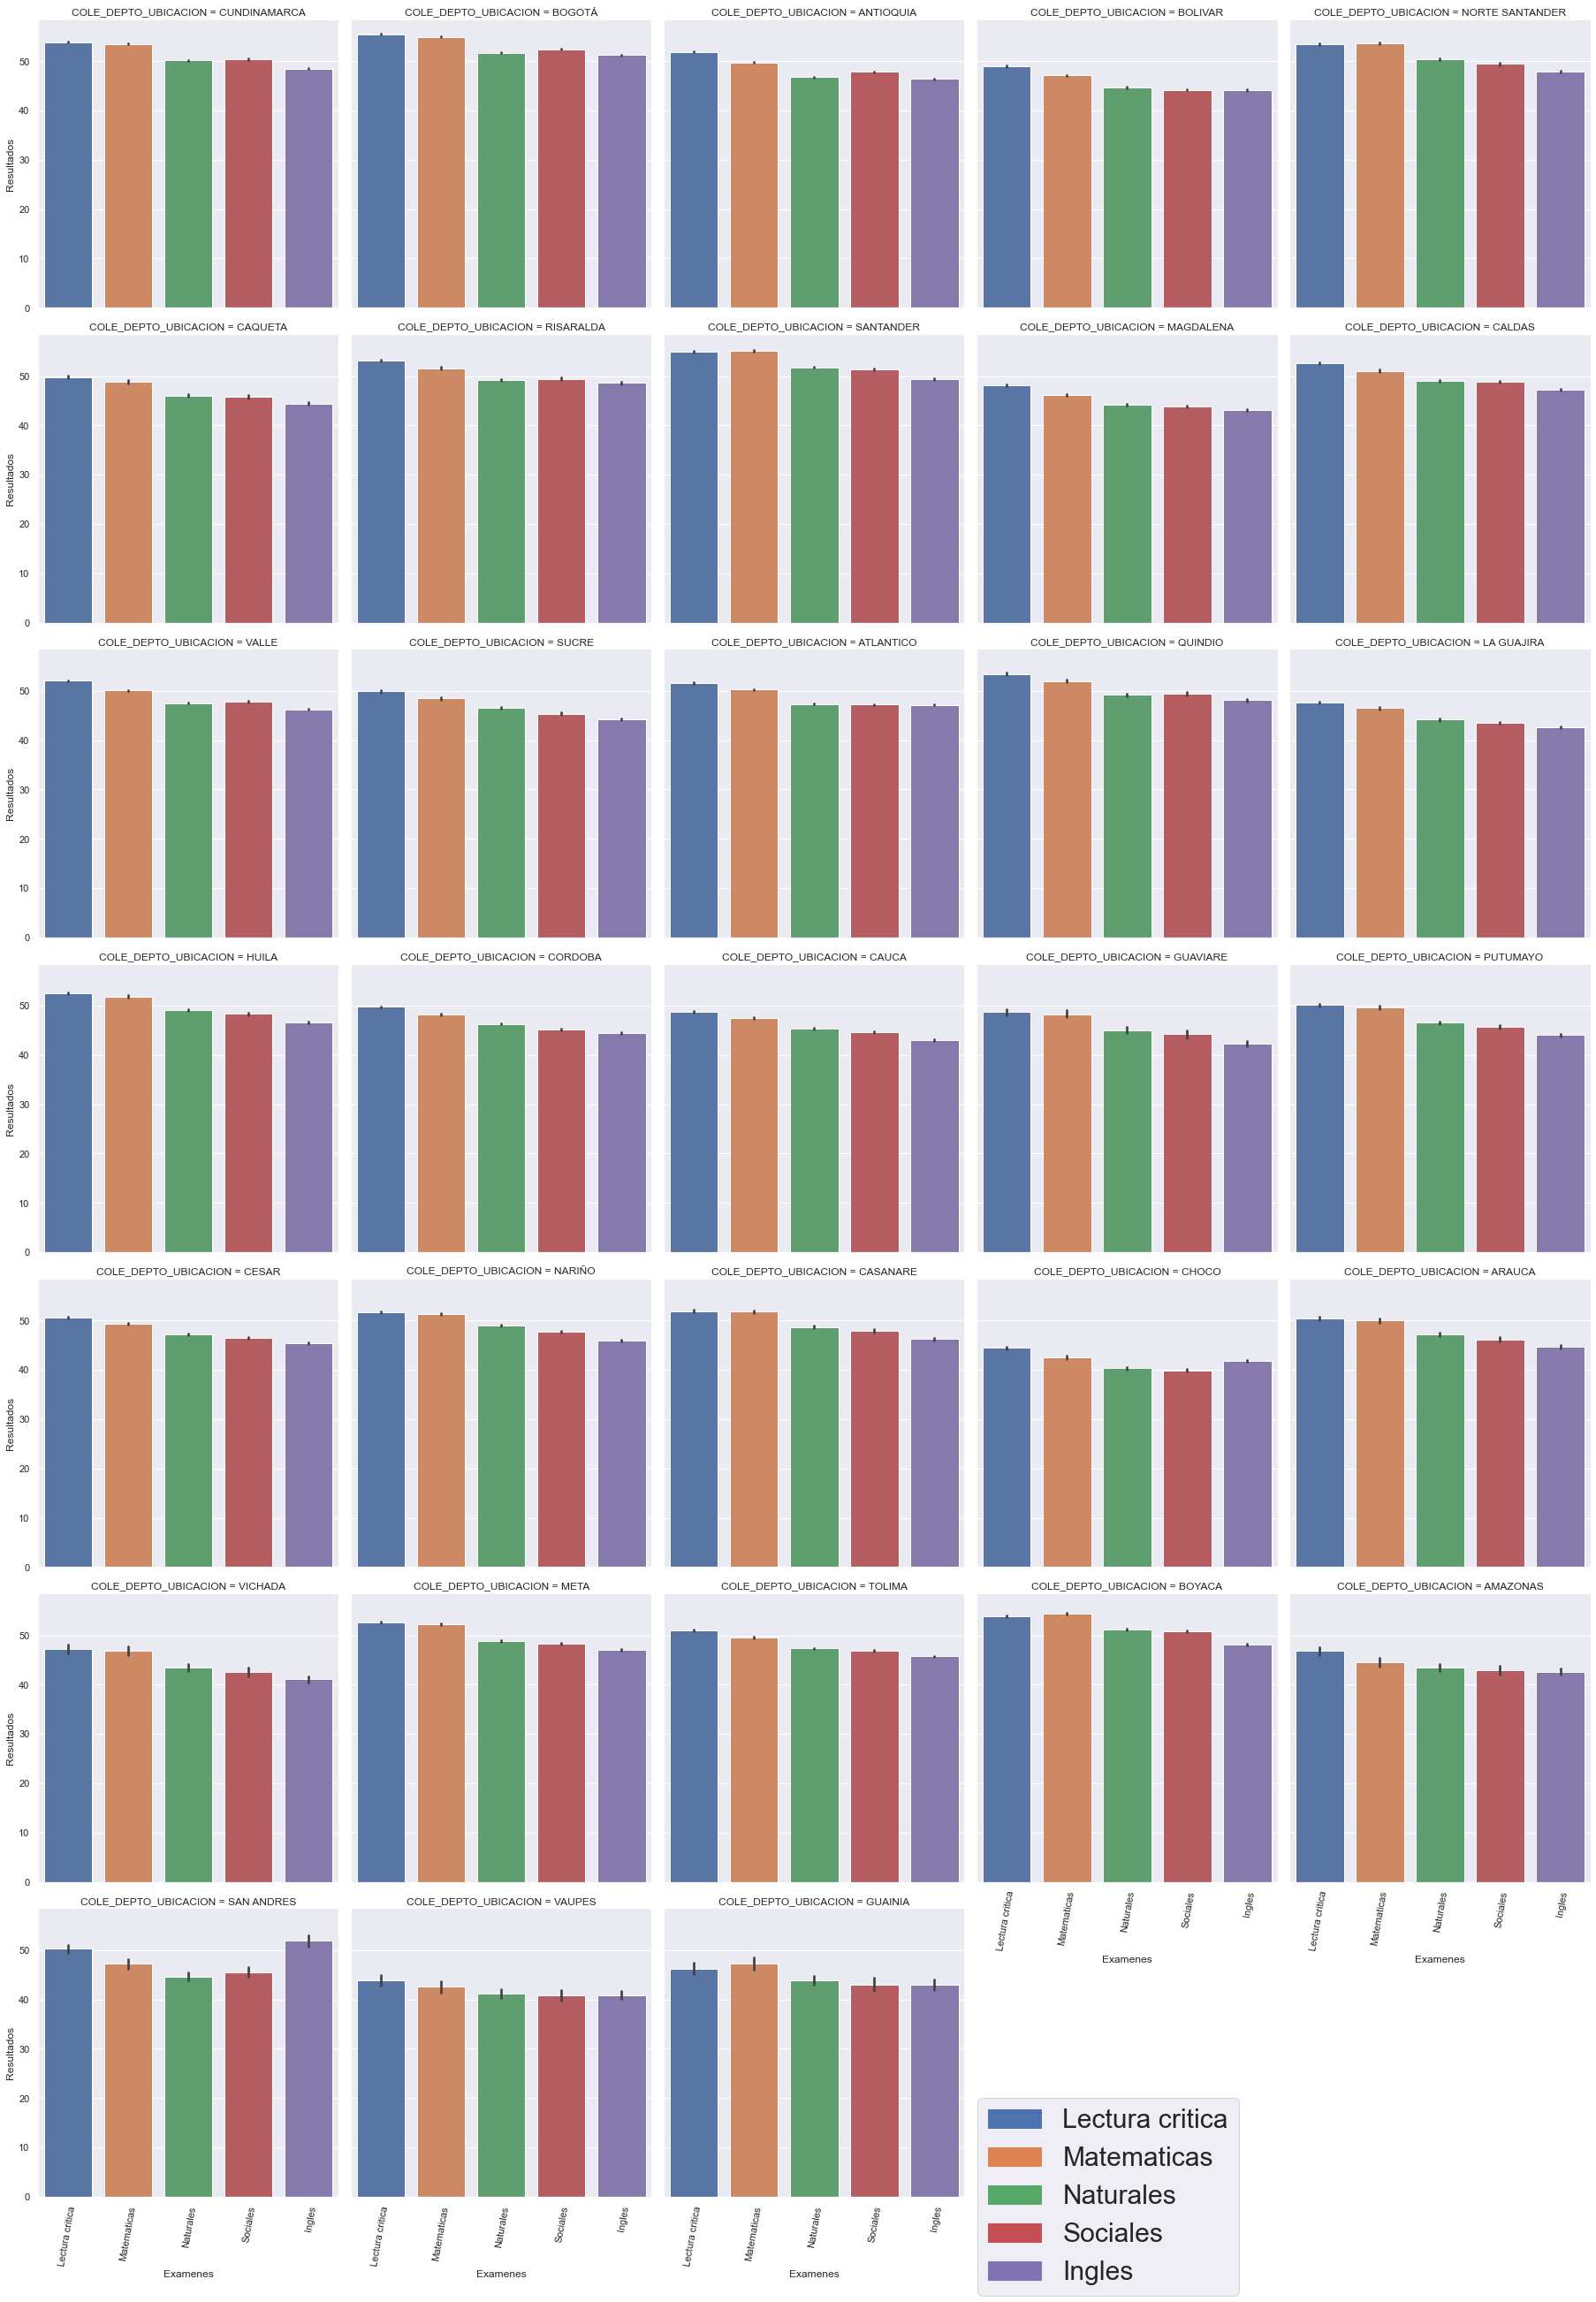

In [248]:
g = sns.catplot(data=df_notas_departamentos,x='Examenes',y ='Resultados', col='COLE_DEPTO_UBICACION', col_wrap = 5, kind='bar')
g.set_xticklabels(rotation=80,ha='right', rotation_mode='anchor')
examenes_names =df_notas_departamentos['Examenes'].unique()
list_legend = []
for i in range(len(examenes_names)): 
    list_legend.append(mpatches.Patch(color=sns.color_palette()[i], label=examenes_names[i]))
plt.legend(handles=list_legend,loc='center left', bbox_to_anchor=(1, 0),prop={'size': 30})
plt.show()

Es interesante ver que independiente de la región del país, su mayoría siguen el mismo patrón. Así que podríamos decir con esta grafica que en Colombia las habilidades según lo mide la prueba, la educación refleja enfocarse mas en lo que son las áreas de las matemáticas y las que tienen que ver con la lingüística o español.   

# Como afecta el entorno socioeconómico a la educación ?

En esta sección abordaremos los aspectos socioeconómicos de los estudiantes en los que han crecido los estudiantes y como estos pueden relacionarse con los resultados medidos por las pruebas

## Puntaje global x Zona de estudio

In [22]:
# Cantidad de registros de cada zona de estudio
df.groupby('COLE_AREA_UBICACION')['PUNT_GLOBAL'].count()

COLE_AREA_UBICACION
RURAL      79888
URBANO    408024
Name: PUNT_GLOBAL, dtype: int64

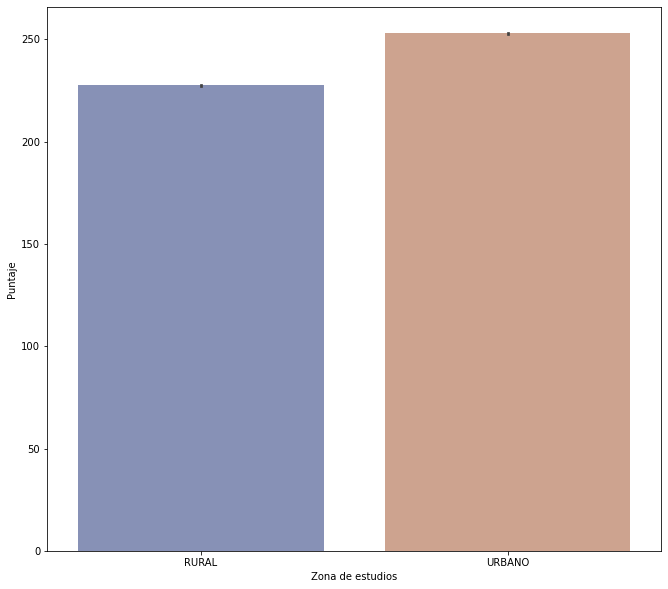

In [53]:
dims = (11, 10)
fig, ax = plt.subplots(figsize=dims)
g = sns.barplot(
    data=df, x='COLE_AREA_UBICACION', y='PUNT_GLOBAL', palette='dark', alpha=.5,ax=ax,order=df['COLE_AREA_UBICACION'].unique()
)
g.set(xlabel='Zona de estudios', ylabel='Puntaje')
plt.show()

En esta grafica podemos ver en principio que la educación de las ciudades en promedio es un poco mejor que la de las zonas rurales del país, cosa que tiene sentido ya que en muchas partes de estes la educación en las zonas rurales no es tan accesible y sobre todo la calidad no es tan buena

## Puntaje x Estrato x Zona

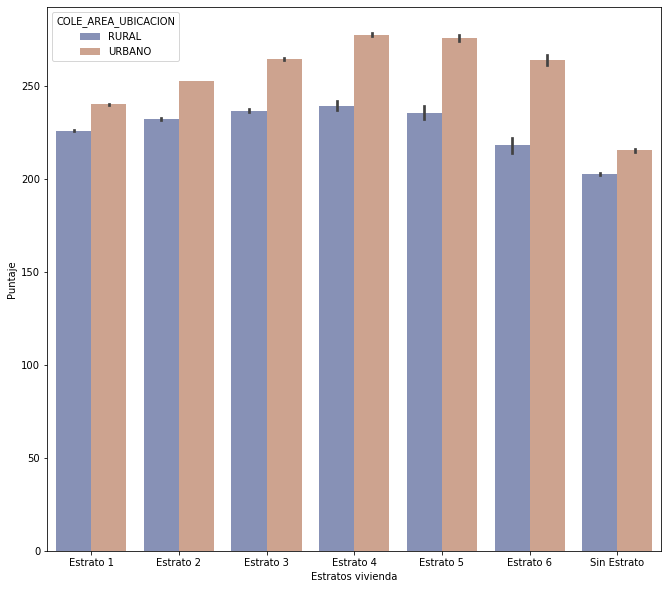

In [45]:
dims = (11, 10)
fig, ax = plt.subplots(figsize=dims)
g = sns.barplot(
    data= df.sort_values(by ='FAMI_ESTRATOVIVIENDA') , x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', palette='dark', alpha=.5,ax=ax,hue='COLE_AREA_UBICACION'
    ,hue_order = df['COLE_AREA_UBICACION'].unique()
)
g.set(xlabel='Estratos vivienda', ylabel='Puntaje')
plt.show()

Como se mencionaba anteriormente el estrato de la vivienda esta relacionado directamente con el nivel económico de la zona, entre mas alto se espera que mayor sea la calidad de vida de las personas allí, mayor serán las comodidades que tienen y mas caro les llegara el recibo de los servicios públicos. Como vemos en la gráfica el promedio va subiendo en la mayoría de los casos según el estrato donde vive el estudiante y esto indica a que a mayor poder adquisitivo tiene la familia, la educacion a la cual puede acceder será de mejor calidad que en el caso de los estrato 1 o 2, donde son muchas familias les toca vivir modestamente o viven en situaciones de pobreza y donde los lo general sus hijos tienen que estudiar en colegios públicos, los cuales normalmente tienen serias deficiencias de calidad.En el caso de los sin estrato pasa algo similar a los estratos 1 o 2, normalmente son zonas poco accesibles y de bajos recursos, pero también están los casos de que la zona es muy nuevas y aun no han tenido el proceso de estratificación, pero este ultimo caso es menos frecuente.

## Relación resultados con el acceso a internet y computadores

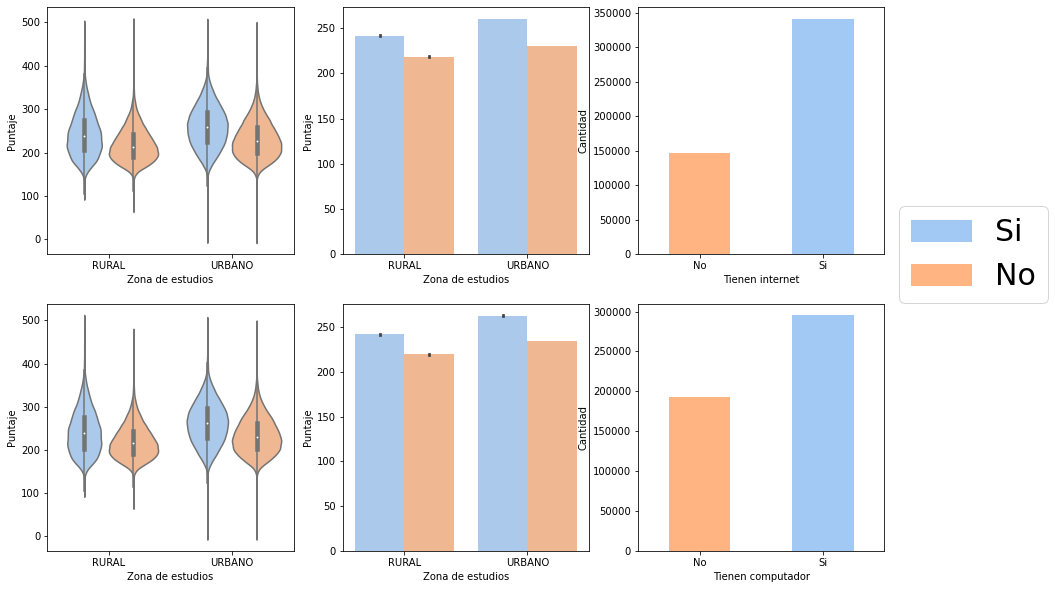

In [100]:
dims = (15, 10)
fig, ax = plt.subplots(2, 3,figsize=dims)

g1 = sns.violinplot(
    data= df, x='COLE_AREA_UBICACION', y='PUNT_GLOBAL',ax=ax[0,0],hue='FAMI_TIENEINTERNET',palette=colors,
    )
g1.set(xlabel='Zona de estudios', ylabel='Puntaje')
g1.get_legend().remove()

g2 = sns.barplot(
    data= df, x='COLE_AREA_UBICACION', y='PUNT_GLOBAL',ax=ax[0,1],hue='FAMI_TIENEINTERNET',palette=colors,
    )
g2.set(xlabel='Zona de estudios', ylabel='Puntaje')
g2.get_legend().remove()

df.groupby('FAMI_TIENEINTERNET').count()['PUNT_GLOBAL'].plot.bar(rot=0,color=[colors[1],colors[0]],ax=ax[0,2])
ax[0,2].set(xlabel='Tienen internet', ylabel='Cantidad')

g3 = sns.violinplot(
    data= df, x='COLE_AREA_UBICACION', y='PUNT_GLOBAL',ax=ax[1,0],hue='FAMI_TIENECOMPUTADOR',palette=colors
    )
g3.set(xlabel='Zona de estudios', ylabel='Puntaje')
g3.get_legend().remove()

g4 = sns.barplot(
    data= df, x='COLE_AREA_UBICACION', y='PUNT_GLOBAL',ax=ax[1,1],hue='FAMI_TIENECOMPUTADOR',palette=colors
    )
g4.set(xlabel='Zona de estudios', ylabel='Puntaje')
g4.get_legend().remove()

df.groupby('FAMI_TIENECOMPUTADOR').count()['PUNT_GLOBAL'].plot.bar(rot=0,color=[colors[1],colors[0]],ax=ax[1,2])
ax[1,2].set(xlabel='Tienen computador', ylabel='Cantidad')

p1 = mpatches.Patch(color=colors[0], label='Si')
p2 = mpatches.Patch(color=colors[1], label='No')

ax[0,2].legend(handles=[p1,p2],loc='center left', bbox_to_anchor=(1, 0),prop={'size': 30})

plt.show()

En esta espoca de covid uno de los elementos mas importantes para la mayoría fue el internet y los computadores, herramientas fundamentales para mantenernos comunicados. A pesar de que en Colombia se esta trabajando fuertemente para reducir esa brecha a algo tan fundamentas como lo es la conectividad, aun falta mucho en ese camino. En esta serie de graficas podemos ver como en ambos casos la falta de estos elementos resulta en promedio en peores resultados en las pruebas, además de la brecha que existe en estas herramientas.

# Hombres vs Mujeres, realmente existe alguna diferencia a nivel educativo ?

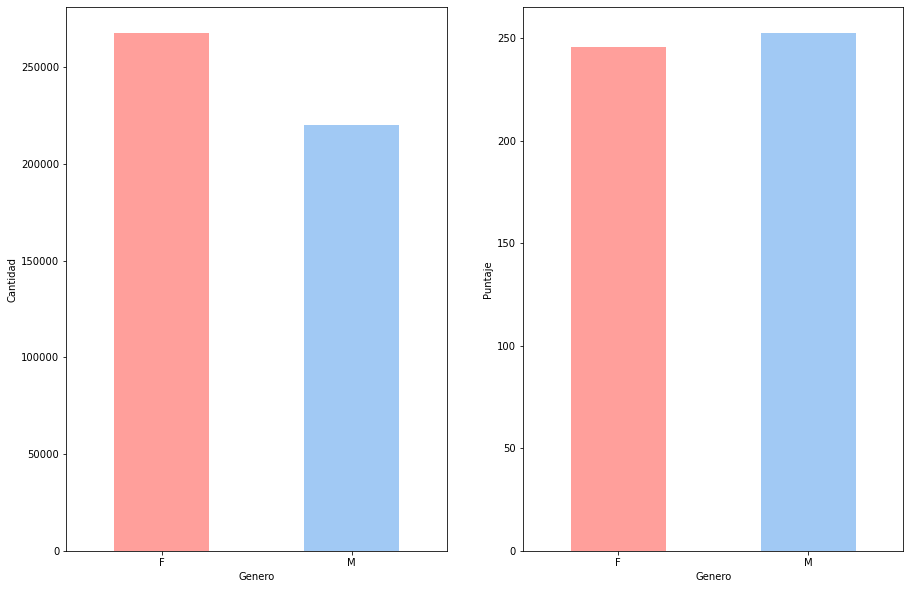

In [27]:
dims = (15, 10)
fig, ax = plt.subplots(1, 2,figsize=dims)
df.groupby('ESTU_GENERO').count()['PUNT_GLOBAL'].plot.bar(rot=0,color=[colors[3],colors[0]],ax=ax[0])
ax[0].set(xlabel='Genero', ylabel='Cantidad')

df.groupby('ESTU_GENERO').mean()['PUNT_GLOBAL'].plot.bar(rot=0,color=[colors[3],colors[0]],ax=ax[1])
ax[1].set(xlabel='Genero', ylabel='Puntaje global')

plt.show()

En estas graficas podemos ver que fue mayor la cantidad de mujeres que tomaron el examen con respecto a los hombres y que realmente no hay mucha diferencia a nivel general en el promedio de los resultados entre ellos.

## Puntaje x estrato hombres vs mujeres

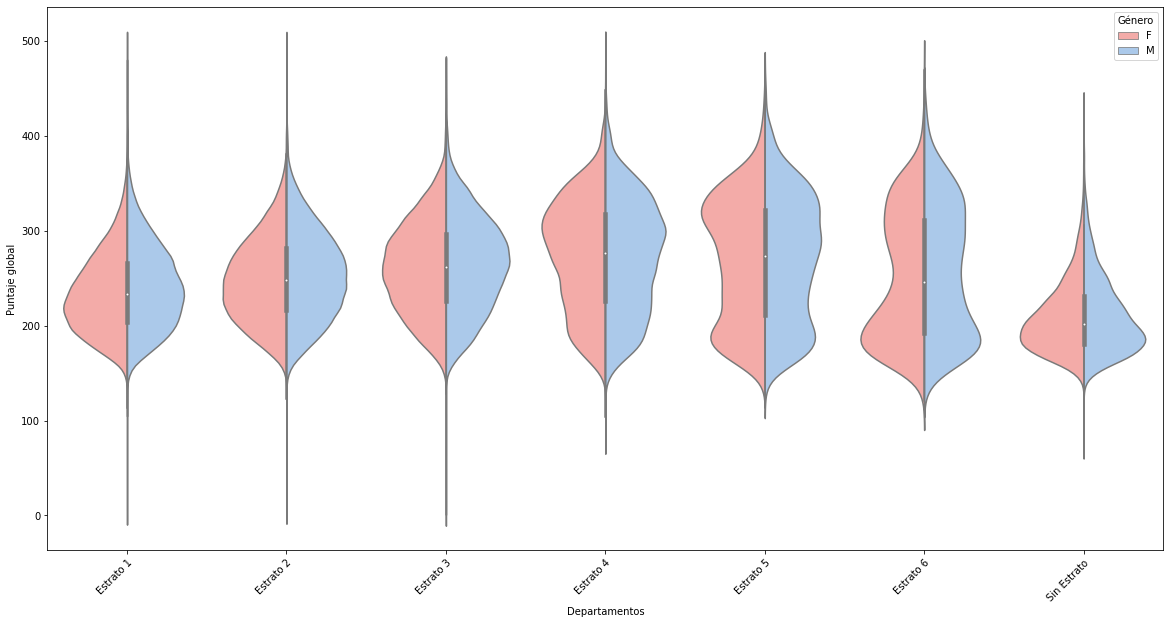

In [42]:
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(
    data= df, x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL',hue='ESTU_GENERO',palette=[colors[3],colors[0]],split=True,ax = ax
    ,order = np.sort(df['FAMI_ESTRATOVIVIENDA'].unique())
    )
ax.set(xlabel='Departamentos', ylabel='Puntaje global')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right', rotation_mode='anchor')
ax.legend(title='Género')
plt.show()

En esta grafica podemos ver la relación del estrato social con respecto al genero y como está la densidad en cada uno de ellos, vemos que en el estrato 5 es donde mayor diferencia hay de ellos. Las mujeres destacan mas por tener mejores puntajes. Sin embargo, podemos concluir que se mantiene una simetría entre ambos 

## Puntaje global x Departamentos hombres vs mujeres 

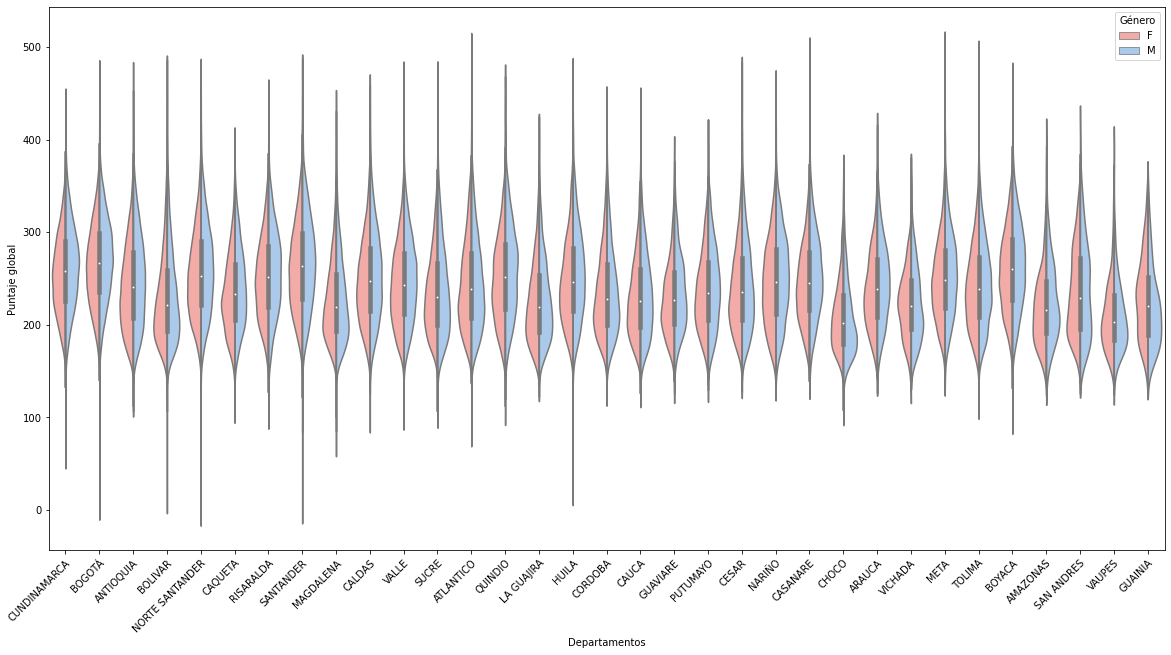

In [29]:
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(
    data= df, x='COLE_DEPTO_UBICACION', y='PUNT_GLOBAL',hue='ESTU_GENERO',palette=[colors[3],colors[0]],split=True,ax = ax
    )
ax.set(xlabel='Departamentos', ylabel='Puntaje global')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right', rotation_mode='anchor')
ax.legend(title='Género')
plt.show()

En este caso podemos ver que la simetría entre ambos se mantiene por lo general en las diferentes partes del país, además que esta grafica nos aporta a su vez como la densidad de los resultados de distribuye en cada departamento de este. Así que podríamos decir que en Colombia no existe ninguna diferencia a nivel educativo de hombres y mujeres

# Que pasa con el ingles en Colombia ?

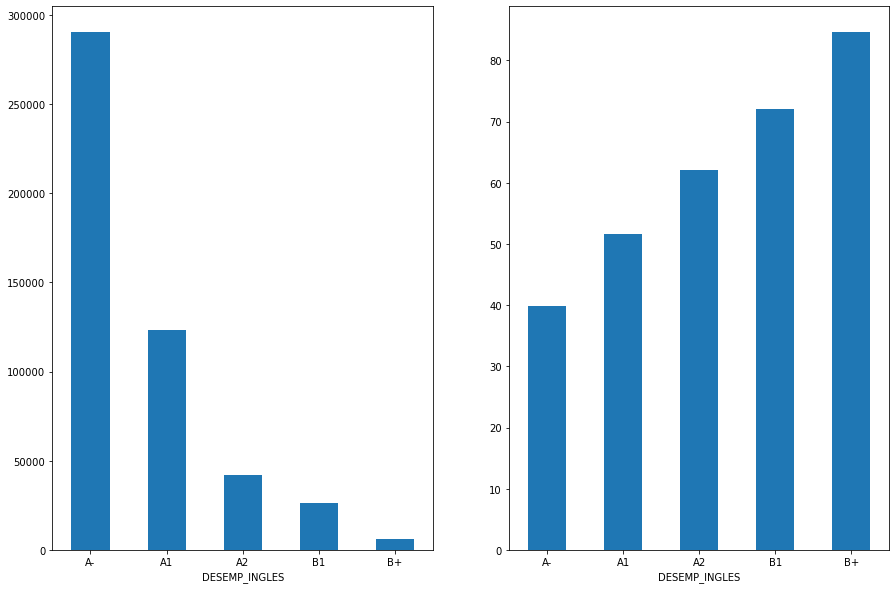

In [57]:
dims = (15, 10)
fig, ax = plt.subplots(1, 2,figsize=dims)
df.groupby('DESEMP_INGLES').count()['PUNT_INGLES'].sort_values(ascending=False).plot.bar(rot=0, ax=ax[0])
df.groupby('DESEMP_INGLES').mean()['PUNT_INGLES'].sort_values().plot.bar(rot=0, ax=ax[1])

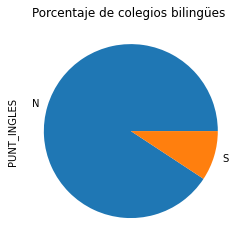

In [249]:
df.groupby('COLE_BILINGUE').count()['PUNT_INGLES'].plot.pie(title='Porcentaje de colegios bilingües ')
plt.show()

Realmente estas graficas muestran la dura realidad del país en ese aspecto, podemos ver como la mayoría de los bachilleres salen con un inglés demasiado básico, pero a que se debe esto. Si miramos la cantidad de estudiantes de colegios bilingües dentro del dataset veremos que representa una cantidad muy pequeña. Son pocos los colegios públicos bilingües que existen en el país y los privados no son accesibles a todo el mundo debido a que por lo general son mas costosos. Pienso que para una oportuna transformación positiva del país será necesario mejorar este aspecto, ya que si la base de todo es la educación y la comunicación efectiva en el inglés es la puerta a muchos mercados internacionales, ahora mismo nos encontramos en una muy mala situación. 